In [146]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm
import glob

In [2]:
f_diss = 0.1
X = 0.74 
F0 = 2.1e7
G0 = 2. * f_diss * F0 * mp/X
r0 = 250. * pc
v0 = 170. * kmps
t0 = r0/v0
Mach = 1.e3
Sigma0        = 52.*Msun_pcsq
rmax = 10. * kpc
tdyn = rmax/v0
sat_time = (Sigma0/G0)/Myr
xi_sol = np.log(G0*t0/Sigma0)
xi_sol, G0

(-3.3011022787786, 9.478378378378378e-18)

# By Flux

In [178]:
# Gamma = np.logspace(-3, np.log10(2.), 100)
# xi_arr = np.logspace(-5, 3., 100) #xi = (chi0*Sigma0*t0/Sigma0)
Gamma = np.logspace(-2, 2., 100)
xi_arr = np.linspace(-11, 7., 100) #xi = np.log(t0*G0/Sigma0)


a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        xi1 = 10.**xi
        dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi1, Mach, 0))[0]

        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma,  Mach, 0))[0] 

        
    
        j+=1
            
    i+=1


In [179]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_flux = 1. - dMassFlux
FH2_flux[FH2_flux<0.0] = 0.0
np.amax(FH2_flux),np.amin(FH2_flux)

(0.9999999999986802, 0.0)

# By Mass

In [60]:
a=40.
gamma= 0.01
x= -4.570932914837872
xcrit = np.log(gamma)
xlow = -10
xhigh = 0.99*xcrit
xi1 = 10.**xi
Ua_x =  np.sqrt((gamma*np.exp(-x) -1.)) * np.sqrt((a-1.)/a) #fixed area
Ua_x, gamma*np.exp(-x), xcrit

/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_38075/46195073.py:8: RuntimeWarning: invalid value encountered in sqrt
  Ua_x =  np.sqrt((gamma*np.exp(-x) -1.)) * np.sqrt((a-1.)/a) #fixed area


(nan, 0.9663421923105078, -4.605170185988091)

In [154]:
Gamma = np.logspace(-3, np.log10(2.), 100)
xi_arr = np.logspace(-5, 3., 100) #xi = (chi0*Sigma0*t0/Sigma0)


sat_rate = 1./sat_time

a = rmax/r0

dMassHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMasstot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
    
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit


        dMassHI[i,j] = integrate.quad(dMass_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi, Mach, 0))[0]

        dMasstot[i,j] = integrate.quad(dMass_tot, xlow, xhigh,  \
                                            args=(a, gamma, Mach, 0))[0] 
        
        

            
        
        j+=1
            
    i+=1


In [155]:
dMass = dMassHI/dMasstot
FH2_mass = 1. - dMass
FH2_mass[FH2_mass<0.0] = 0.0
np.amax(FH2_mass),np.amin(FH2_mass)

(0.9999672241027121, 0.0)

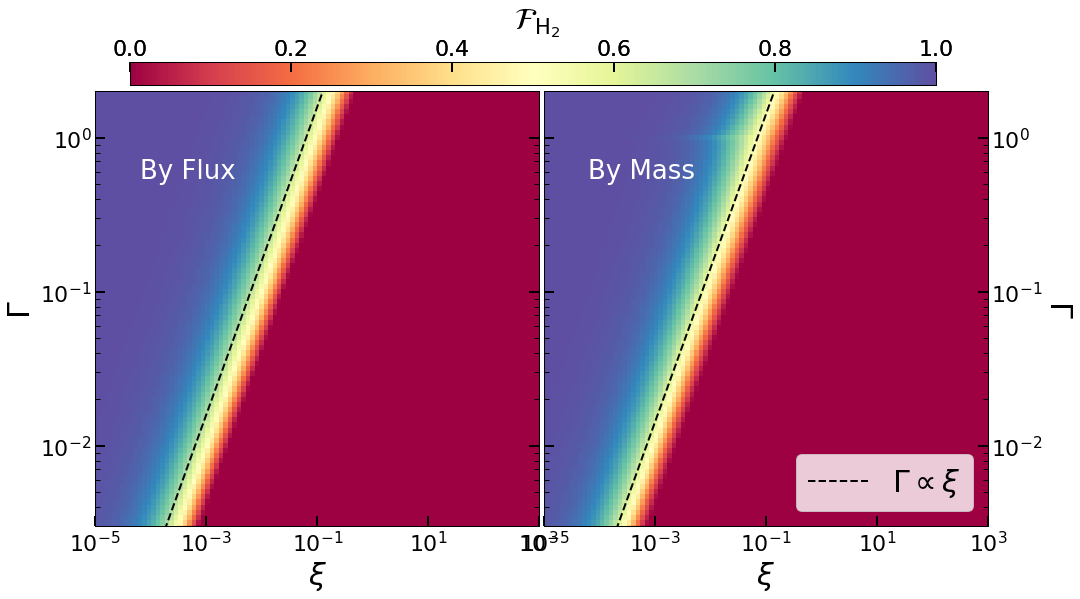

In [158]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(16,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax[0].pcolormesh(xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
# cax.set_title(r" $\mathcal{F}_{\rm H_2, flux}^{\rm asym}$")
ax[0].set_xlim(1.e-5, 1.e3)
ax[0].set_ylim(3.e-3, 2.)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=30)
ax[0].set_xlabel(r'$\xi$', fontsize=30)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



plot = ax[1].pcolormesh(xi_arr, Gamma, np.transpose(FH2_mass),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[1].set_xlim(1.e-5, 1.e3)
ax[1].set_ylim(3.e-3, 2.)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].yaxis.tick_right()
ax[1].set_ylabel(r'$\Gamma$', fontsize=30, rotation=270, labelpad=30)
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel(r'$\xi$', fontsize=30)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

ax[0].text(0.1, 0.8,'By Flux', transform=ax[0].transAxes, color='white', fontsize=26)
ax[1].text(0.1, 0.8,'By Mass', transform=ax[1].transAxes, color='white', fontsize=26)


slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.2) 
ax[0].plot(xi_arr, 10.**yy, color='black', ls='--', lw=2.)

slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.15) 
ax[1].plot(xi_arr, 10.**yy, color='black', ls='--', lw=2., label=r'$\Gamma \propto \xi$')
ax[1].legend(loc='lower right', fontsize="30")


file_name = os.path.join(fig_path, 'gamma_xi.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )


/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_38075/1750870501.py:29: RuntimeWarning: invalid value encountered in log10
  yy =  (np.log10(xi_arr) * slope + 1.05)


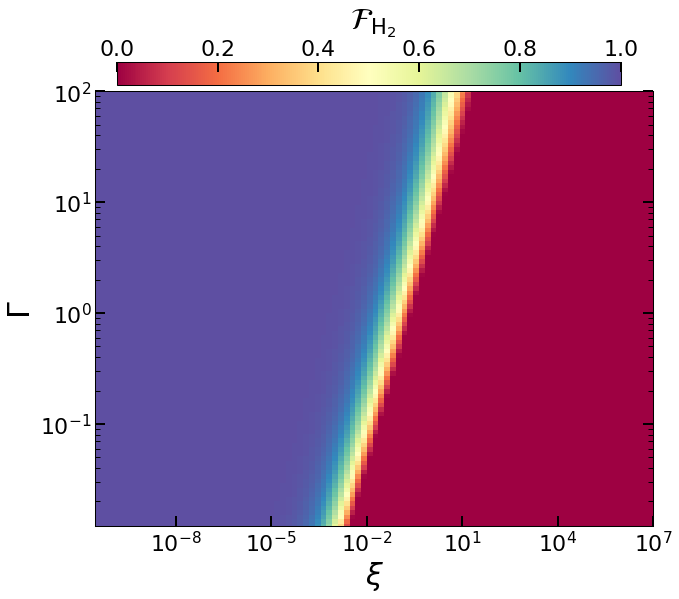

In [183]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(10,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax.pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
# ax.set_xlim(1.e-5, 1.e3)
# ax.set_ylim(3.e-3, 2.)
ax.set_xlim(3.e-11, 1.e7)
ax.set_ylim(1.2e-2, 1.e2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=30)
ax.set_xlabel(r'$\xi$', fontsize=30)
ax.tick_params(axis='y', which='both', labelleft=True, right=True, left=True)

slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.05) 
# ax.plot(xi_arr, 10.**yy, color='black', ls='--', lw=2., label=r'$\Gamma \propto \xi$')
# ax.legend(loc='lower right', fontsize="30")

file_name = os.path.join(fig_path, 'gamma_xi.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )


# Add Real Data to the Above Plot

In [91]:
data_home = os.path.join(home, "Data/CleanData/")
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
log_siggas = []
log_sigSFR = []
log_siggas_tdyn = []
galtype = []
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
    print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type = str(line.split()[3])
            if(file == '/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt'):
                siggas = np.log10(siggas)
                sigSFR = np.log10(sigSFR)
                sgastdyn = np.log10(sgastdyn)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            galtype.append(gal_type)
            break

/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi08.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/bouche07.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/genzel2010.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98a.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/tacconi13.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/kennicutt98b.txt
/Users/aditivijayan/Projects/PhotoIonization/Data/CleanData/daddi10.txt


In [ ]:
daddi_label = ["BzK-4171", "BzK-21000", "BzK-16000", "BzK-17999", "BzK-12591", "BzK-25536"]
daddi_re  = 1.e3 * np.asarray([3.7, 6.2, 5.1, 4.7, 4.5, 3.0]) * pc
gamm_alt = 

In [145]:
daddi_sfr = 1.e6 * np.asarray([103., 220., 152., 148., 400., 62.]) #Msun/Myr
#kpc
daddi_sgas = np.asarray([2.95, 2.96, 2.56, 2.66, 2.53, 2.88])
daddi_ssfr = daddi_sfr/daddi_re**2
10.** daddi_sgas

array([891.25093813, 912.01083936, 363.07805477, 457.08818961,
       338.84415614, 758.57757503])

In [92]:
log_siggas = np.asarray(log_siggas)
log_sigSFR = np.asarray(log_sigSFR)
log_siggas_tdyn = np.asarray(log_siggas_tdyn)
galtype = np.asarray(galtype)

In [93]:

tdyn = rmax/v0
sat_time = (Sigma0/G0)/Myr
xi_sol = np.log(G0*t0/Sigma0)
xi_sol, G0

(-3.3011022787786, 9.478378378378378e-18)

In [94]:
fg = 0.1
sigSFR = 10.**(log_sigSFR)*Msun/yr_to_sec/kpc/kpc
p_avg = 3.e3 * 1.e5
G = 6.67e-8
siggas = 10.**(log_siggas)*Msun/pc/pc
siggas_tdyn = 10.**(log_siggas_tdyn)*Msun/yr_to_sec/pc/pc/1.e6
gamma_data = 2. * fg * sigSFR * p_avg/(math.pi * G * (siggas**2.))
gamma_data = sigSFR * p_avg * tdyn**2/(16. * math.pi**3 * r0**2 * siggas)
G0 = 1. * 9.478378378378378e-18 
xi_data = np.log(G0/siggas_tdyn)

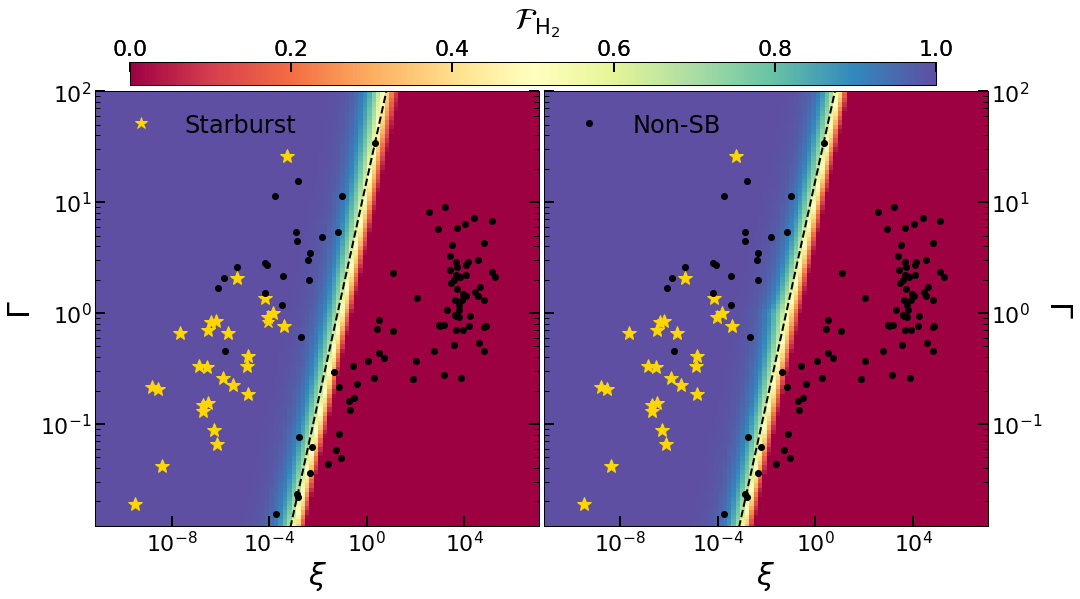

In [99]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(16,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax[0].pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
# cax.set_title(r" $\mathcal{F}_{\rm H_2, flux}^{\rm asym}$")
# ax[1].set_xlim(-11., 7.)
ax[0].set_ylim(1.2e-2, 1.e2)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=30)
ax[0].set_xlabel(r'$\xi$', fontsize=30)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



plot = ax[1].pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_mass),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
# ax[1].set_xlim(-11., 7.)
ax[1].set_ylim(1.2e-2, 1.e2)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].yaxis.tick_right()
ax[1].set_ylabel(r'$\Gamma$', fontsize=30, rotation=270, labelpad=30)
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel(r'$\xi$', fontsize=30)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

# ax[0].text(0.1, 0.8,'By Flux', transform=ax[0].transAxes, color='white', fontsize=26)
# ax[1].text(0.1, 0.8,'By Mass', transform=ax[1].transAxes, color='white', fontsize=26)


slope = 1.
yy =  ( xi_arr * slope + 1.2) 
ax[0].plot(10.**xi_arr, 10.**yy, color='black', ls='--', lw=2.)
# ax[0].legend(loc='lower right', fontsize="30")

slope = 1.
yy =  ( xi_arr * slope + 1.2) 
ax[1].plot(10.**xi_arr, 10.**yy, color='black', ls='--', lw=2.)



for i in range(xi_data.shape[0]):
    if(galtype[i]=='Starburst'):
        if(i==3):
            ax[0].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='12',label='Starburst')
        else:
            ax[0].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
            ax[1].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
    else:
        if(i==16):
            ax[0].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')
            ax[1].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', label='Non-SB')
        else:
            ax[0].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')
            ax[1].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')

ax[0].legend(loc='upper left', fontsize="24", frameon=False)
ax[1].legend(loc='upper left', fontsize="24", frameon=False)
# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )


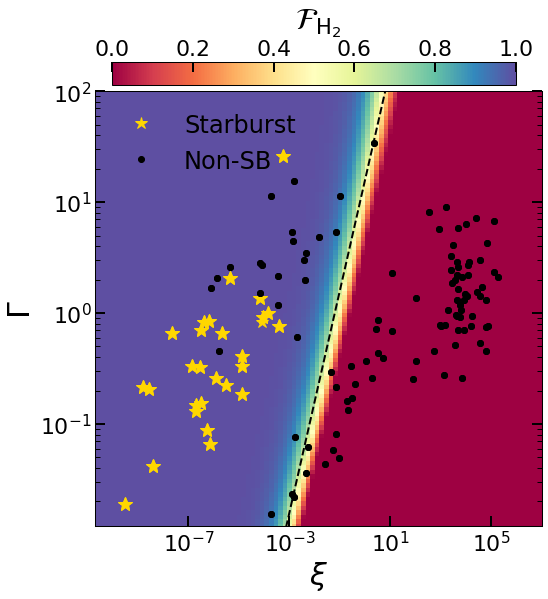

In [134]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax.pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
# ax.set_xlim(-11., 7.)
ax.set_ylim(1.2e-2, 1.e2)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=30)
ax.set_xlabel(r'$\xi$', fontsize=30)
ax.tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



slope = 1.
yy =  ( xi_arr * slope + 1.2) 
ax.plot(10.**xi_arr, 10.**yy, color='black', ls='--', lw=2.)
# ax.legend(loc='lower right', fontsize="30")
ax.set_xlim(2.e-11, 1.e7)


for i in range(xi_data.shape[0]):
    if(galtype[i]=='Starburst'):
        if(i==3):
            ax.plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='12',label='Starburst')
        else:
            ax.plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
            ax.plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
    else:
        if(i==16):
            ax.plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')
            ax.plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', label='Non-SB')
        else:
            ax.plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')
            ax.plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')

ax.legend(loc='upper left', fontsize="24", frameon=False)
ax.legend(loc='upper left', fontsize="24", frameon=False)
# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )


# Fixed Solid Angle Case

In [2]:
Gamma = np.logspace(-2, 2., 100)
xi_arr = np.linspace(-11, 7., 100) #xi = np.log(t0*G0/Sigma0)

sat_rate = 1./sat_time

a = rmax/r0

dMassFluxHI_SA = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot_SA = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        xi1 = 10.**xi

        
        dMassFluxtot_SA[i,j] = integrate.dblquad(dMassFlux_HI, 1, a, xlow, xhigh,   \
                                            args=(gamma,  Mach, 2))[0]
        dMassFluxtot_SA[i,j] = integrate.dblquad(dMassFlux_HI, 1, a, xlow, xhigh,   \
                                            args=(gamma,  Mach, 2))[0]
        
        
        j+=1
            
    i+=1


NameError: name 'np' is not defined

In [169]:
dMassFlux_SA = dMassFluxHI_SA/dMassFluxtot_SA
FH2_flux_SA = 1. - dMassFlux_SA
FH2_flux_SA[FH2_flux_SA<0.0] = 0.0
np.amax(FH2_flux_SA),np.amin(FH2_flux_SA)

(0.9999999999998972, 0.0)

# Intermediate Area Case

In [170]:
Gamma = np.logspace(-2, 2., 100)
xi_arr = np.linspace(-11, 7., 100) #xi = np.log(t0*G0/Sigma0)

sat_rate = 1./sat_time

a = rmax/r0

dMassFluxHI_Int = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot_Int = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
        xi1 = 10.**xi

        dMassFluxHI_Int[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi1, Mach, 1))[0]

        dMassFluxtot_Int[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma, Mach, 1))[0] 

        
        
        j+=1
            
    i+=1


In [171]:
dMassFlux_Int = dMassFluxHI_Int/dMassFluxtot_Int
FH2_flux_Int = 1. - dMassFlux_Int
FH2_flux_Int[FH2_flux_Int<0.0] = 0.0
np.amax(FH2_flux_Int),np.amin(FH2_flux_Int)

(0.9999999999999916, 0.0)

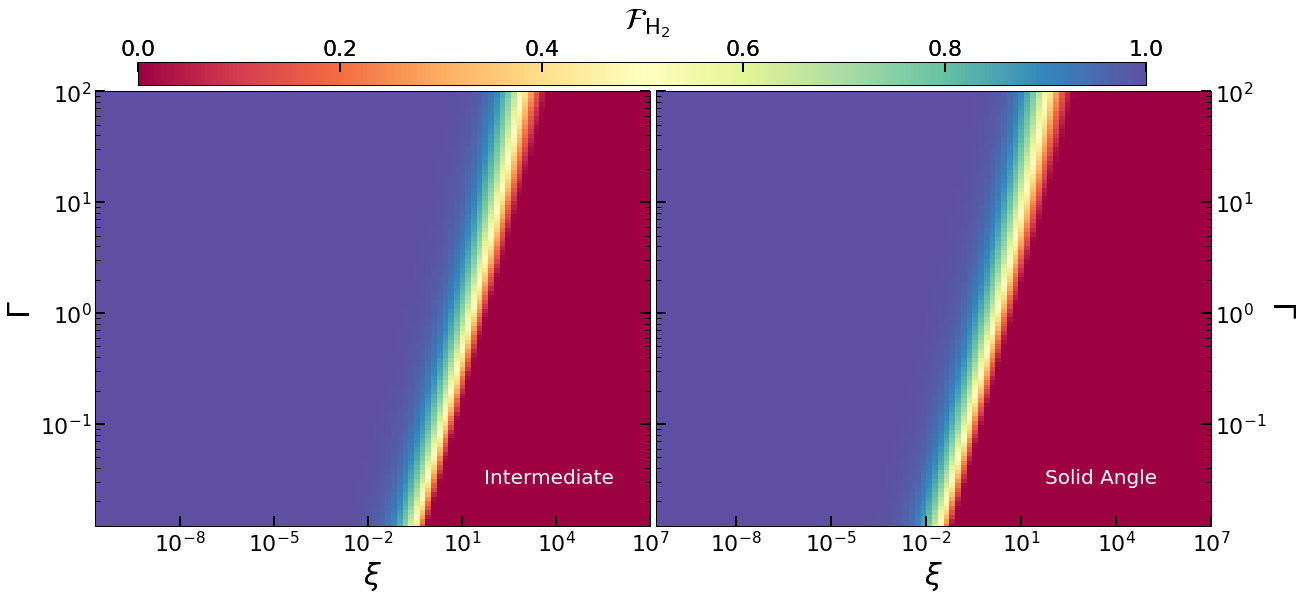

In [184]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(20,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax[0].pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux_Int),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
# cax.set_title(r" $\mathcal{F}_{\rm H_2, flux}^{\rm asym}$")
ax[0].set_xlim(2.e-11, 1.e7)
ax[0].set_ylim(1.2e-2, 1.e2)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=30)
ax[0].set_xlabel(r'$\xi$', fontsize=30)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



plot = ax[1].pcolormesh(10.**xi_arr, Gamma, np.transpose(FH2_flux_SA),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[1].set_xlim(3.e-11, 1.e7)
ax[1].set_ylim(1.2e-2, 1.e2)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].yaxis.tick_right()
ax[1].set_ylabel(r'$\Gamma$', fontsize=30, rotation=270, labelpad=30)
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel(r'$\xi$', fontsize=30)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

# ax[0].text(0.1, 0.8,'By Flux', transform=ax[0].transAxes, color='white', fontsize=26)
# ax[1].text(0.1, 0.8,'By Mass', transform=ax[1].transAxes, color='white', fontsize=26)


# slope = 1.2
# yy =  ( xi_arr * slope -0.2) 
# ax[1].plot(10.**xi_arr, 10.**yy, color='red', ls='--', lw=2.)
# # ax[0].legend(loc='lower right', fontsize="30")

# slope = 1.2
# yy =  ( xi_arr * slope -1.4) 
# ax[0].plot(10.**xi_arr, 10.**yy, color='red', ls='--', lw=2.)



# for i in range(xi_data.shape[0]):
#     if(galtype[i]=='Starburst'):
#         if(i==3):
#             ax[0].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='12',label='Starburst')
#         else:
#             ax[0].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
#             ax[1].plot(10.**xi_data[i], gamma_data[i], '*', color='gold', markersize='14')
#     else:
#         if(i==16):
#             ax[0].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6')
#             ax[1].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.7,\
#                        label='Non-SB')
#         else:
#             ax[0].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.5)
#             ax[1].plot(10.**xi_data[i], gamma_data[i], 'o', color='black', markersize='6', alpha=0.5)

# ax[0].legend(loc='upper left', fontsize="24", frameon=False)
# ax[1].legend(loc='upper left', fontsize="24", frameon=False)

ax[0].text(0.7, 0.1,'Intermediate', transform=ax[0].transAxes, color='white', fontsize=20)
ax[1].text(0.7, 0.1,'Solid Angle', transform=ax[1].transAxes, color='white', fontsize=20)



# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals_SA_int.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


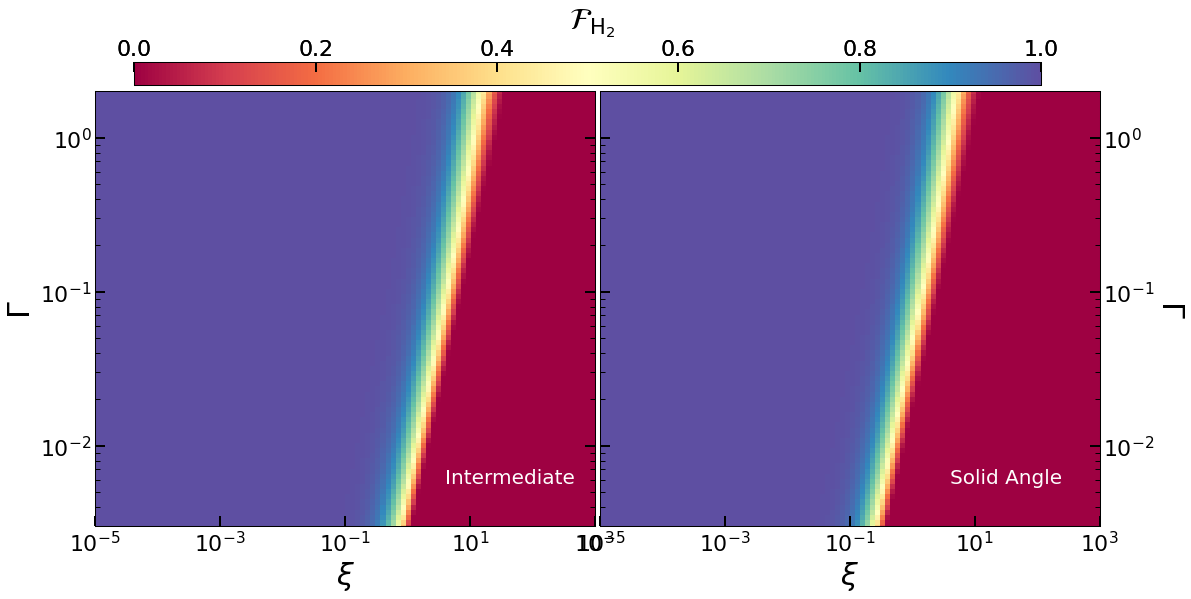

In [165]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(18,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax[0].pcolormesh(xi_arr, Gamma, np.transpose(FH2_flux_Int),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
# cax.set_title(r" $\mathcal{F}_{\rm H_2, flux}^{\rm asym}$")
ax[0].set_xlim(1.e-5, 1.e3)
ax[0].set_ylim(3.e-3, 2.)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=30)
ax[0].set_xlabel(r'$\xi$', fontsize=30)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



plot = ax[1].pcolormesh(xi_arr, Gamma, np.transpose(FH2_flux_SA),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[1].set_xlim(1.e-5, 1.e3)
ax[1].set_ylim(3.e-3, 2.)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].yaxis.tick_right()
ax[1].set_ylabel(r'$\Gamma$', fontsize=30, rotation=270, labelpad=30)
ax[1].yaxis.set_label_position("right")
ax[1].set_xlabel(r'$\xi$', fontsize=30)
ax[1].tick_params(axis='y', which='both', labelleft=False, labelright=True, right=True, left=True)

# ax[0].text(0.1, 0.8,'By Flux', transform=ax[0].transAxes, color='white', fontsize=26)
# ax[1].text(0.1, 0.8,'By Mass', transform=ax[1].transAxes, color='white', fontsize=26)


# slope = 1.2
# yy =  ( xi_arr * slope -0.2) 
# ax[1].plot(10.**xi_arr, 10.**yy, color='red', ls='--', lw=2.)
# ax[0].legend(loc='lower right', fontsize="30")

# slope = 1.2
# yy =  ( xi_arr * slope -1.4) 
# ax[0].plot(10.**xi_arr, 10.**yy, color='red', ls='--', lw=2.)


ax[0].legend(loc='upper left', fontsize="24", frameon=False)
ax[1].legend(loc='upper left', fontsize="24", frameon=False)

ax[0].text(0.7, 0.1,'Intermediate', transform=ax[0].transAxes, color='white', fontsize=20)
ax[1].text(0.7, 0.1,'Solid Angle', transform=ax[1].transAxes, color='white', fontsize=20)



# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals_SA_int.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )
